In [66]:
import numpy as np
import h5py
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(self.time-skipTime,self.spikeID,color='black',s=1)

In [53]:
with h5py.File('Snudda/networks/tinySim/network-neuron-positions.hdf5', 'r') as hdf5:
    base_items = list(hdf5.items())
    print("Items on root :", base_items)
    meta = hdf5.get('meta')
    meta_items = list(meta.items())
    print("Items on meta :", meta_items)
    network = hdf5.get('network')
    network_items = list(network.items())
    print("Items on network :", network_items)
    neurons = network.get('neurons')
    neurons_items = list(neurons.items())
    print("Items on neurons :", neurons_items)
    neuronID = np.array(neurons.get('neuronID'))
    neuron_type = np.array(neurons.get('morphology'))

Items on root : [('meta', <HDF5 group "/meta" (2 members)>), ('network', <HDF5 group "/network" (1 members)>)]
Items on meta : [('config', <HDF5 dataset "config": shape (), type "|O">), ('configFile', <HDF5 dataset "configFile": shape (), type "|O">)]
Items on network : [('neurons', <HDF5 group "/network/neurons" (19 members)>)]
Items on neurons : [('axonDensity', <HDF5 dataset "axonDensity": shape (99,), type "|S245">), ('axonDensityBoundsXYZ', <HDF5 dataset "axonDensityBoundsXYZ": shape (99, 6), type "<f8">), ('axonDensityRadius', <HDF5 dataset "axonDensityRadius": shape (99,), type "<f8">), ('axonDensityType', <HDF5 dataset "axonDensityType": shape (99,), type "|S3">), ('channelID', <HDF5 dataset "channelID": shape (99,), type "<i8">), ('channelMethod', <HDF5 dataset "channelMethod": shape (), type "|O">), ('hoc', <HDF5 dataset "hoc": shape (99,), type "|S10">), ('maxAxonRadius', <HDF5 dataset "maxAxonRadius": shape (99,), type "<f8">), ('maxDendRadius', <HDF5 dataset "maxDendRadius

In [77]:
neuron_type2 = []

for i in range (0, neuron_type.size) :
    neuron_type2.append(str(neuron_type[i]))
    
print(type(neuron_type2[0]))

for i in range (0, len(neuron_type2)):
    if "dspn" in neuron_type2[i]:
        neuron_type2[i] = "dspn"
    elif ('ispn' in neuron_type2[i]) :
        neuron_type2[i] = "ispn"
    elif 'lts' in neuron_type2[i] :
        neuron_type2[i] = "lts"
    elif 'fs' in neuron_type2[i] :
        neuron_type2[i] = "fs"
    elif 'chin' in neuron_type2[i] :
        neuron_type2[i] = "chin"
print(neuron_type2)



|S207
b'/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax.swc'
<class 'str'>
['dspn', 'dspn', 'dspn', 'dspn', 'ispn', 'dspn', 'ispn', 'ispn', 'dspn', 'ispn', 'ispn', 'ispn', 'dspn', 'ispn', 'dspn', 'dspn', 'ispn', 'ispn', 'dspn', 'dspn', 'dspn', 'ispn', 'dspn', 'ispn', 'dspn', 'ispn', 'ispn', 'ispn', 'dspn', 'ispn', 'dspn', 'ispn', 'ispn', 'dspn', 'dspn', 'dspn', 'dspn', 'dspn', 'ispn', 'dspn', 'ispn', 'ispn', 'ispn', 'ispn', 'ispn', 'ispn', 'dspn', 'dspn', 'ispn', 'ispn', 'dspn', 'chin', 'ispn', 'ispn', 'ispn', 'dspn', 'dspn', 'dspn', 'ispn', 'dspn', 'ispn', 'dspn', 'ispn', 'ispn', 'dspn', 'dspn', 'lts', 'ispn', 'ispn', 'dspn', 'dspn', 'dspn', 'ispn', 'dspn', 'ispn', 'dspn', 'fs', 'dspn', 'dspn', 'ispn', 'dspn', 'dspn', 'dspn', 'dspn', 'ispn', 'ispn', 'dspn', 'dspn', 'dspn', 'ispn', 'ispn', 'dspn', 'ispn', 'ispn', 'dspn', 'ispn', 'ispn', 'ispn', 'ispn']
<class 'str'>


    neuronID neuron_type
0          0        dspn
1          1        dspn
2          2        dspn
3          3        dspn
4          4        ispn
..       ...         ...
94        94        dspn
95        95        ispn
96        96        ispn
97        97        ispn
98        98        ispn

[99 rows x 2 columns]


<AxesSubplot:ylabel='neuron_type'>

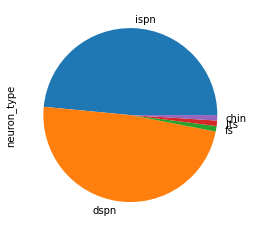

In [79]:


d = {'neuronID': neuronID, 'neuron_type': neuron_type2}
df = pd.DataFrame(data=d)
print(df)
df['neuron_type'].value_counts().plot(kind='pie')


In [67]:
with h5py.File('Snudda/networks/tinySim/network-pruned-synapses.hdf5', 'r') as file:
    network = file.get('network')
    synapses = network.get('synapses')
    neurons = network.get('neurons')
    neuronID = np.array(neurons.get('neuronID'))
    morphology = np.array(neurons.get('morphology'))
    
    syn_table = []
    for i in range(0,len(synapses)):
        syn_table.append(synapses[i])

    df2 = pd.DataFrame(data=syn_table)
    df2.columns = ['sourceID', 'destinID', '3', '4', '5', 'synapseType', '7', 'dentDistance', '9', '10', '11', '12', '13']
    print(df2)    

      sourceID  destinID    3    4    5  synapseType   7  dentDistance    9  \
0            2         0  113  147  145           26  14           157   45   
1            2         0  114  166  155           26  14           236  109   
2            2         0  129  132  155           26  14           196   78   
3            4         0  114  145  131           26  17           201   28   
4            4         0  117  161  153           26  17           165   89   
...        ...       ...  ...  ...  ...          ...  ..           ...  ...   
6874        82        98  146  113  164           26  15           211  170   
6875        95        98  136  117  175           26  18           210  145   
6876        95        98  144  116  166           26  18           214  197   
6877        95        98  145  113  164           26  18           171  172   
6878        95        98  162  136  156           26  18           151   80   

      10   11   12      13  
0     56   32  365  25

In [68]:
neuron_type = []

for i in range (0, morphology.size) :
    neuron_type.append(str(morphology[i]))

#maybe this loop can be erased, if it is going to make the process lengthy (finding and replacing every neuron).
#we can leave the neuron_type as is, with the long doc path, and just change the name at the end, for printing
for i in range (0, len(neuron_type)):
    if "dspn" in neuron_type[i]:
        neuron_type[i] = "DSPN"
    elif ('ispn' in neuron_type[i]) :
        neuron_type[i] = "ISPN"
    elif 'lts' in neuron_type[i] :
        neuron_type[i] = "LTS"
    elif 'fs' in neuron_type[i] :
        neuron_type[i] = "FS"
    elif 'chin' in neuron_type[i] :
        neuron_type[i] = "ChIN"
            
structure_df = {'neuronID': neuronID, 'neuron_type': neuron_type}
df = pd.DataFrame(data=structure_df)




In [69]:
#dsp_to_dsp = []
#print(df2['sourceID'])
#for row in df2:
#    if(row['sourceID'])

0        2
1        2
2        2
3        4
4        4
        ..
6874    82
6875    95
6876    95
6877    95
6878    95
Name: sourceID, Length: 6879, dtype: int64


In [27]:
#net = df.get('network')
#.get('synapses')
print(df.info)
print(type(df))
df.info

<bound method HDFStore.info of <class 'pandas.io.pytables.HDFStore'>
File path: Snudda/networks/tinySim/network-pruned-synapses.hdf5
>
<class 'pandas.io.pytables.HDFStore'>


<bound method HDFStore.info of <class 'pandas.io.pytables.HDFStore'>
File path: Snudda/networks/tinySim/network-pruned-synapses.hdf5
>

In [19]:
type(df)

pandas.io.pytables.HDFStore

In [39]:
with open("Snudda/networks/tinySim/simulation/volt.txt", 'r') as volt_txt:
    volt = volt_txt.readlines()

time = np.array(volt[0].split(","),float)
volt = volt[1:]
volt_2 =[]
for i in range(0,len(volt)):
    volt_2.append(np.array(volt[i].split(","),float))
print(volt_2[0])

[  0.     -86.     -87.85   -88.0498 -88.1834 -88.295  -88.3937 -88.483
 -88.5645 -88.6392 -88.7078 -88.7246 -88.6419 -88.5493 -88.4677 -88.4029
 -88.3556 -88.3244 -88.3074 -88.2621 -88.1278 -87.9956 -87.8847 -87.799
 -87.7379 -87.6962 -87.6357 -87.5528 -87.4702 -87.3833 -87.2779 -87.1706
 -87.0755 -86.9892 -86.854  -86.7109 -86.5836 -86.4808 -86.4052 -86.3561
 -86.3314 -86.3284 -86.2419 -86.105  -85.9951 -85.9188 -85.8747 -85.8593
 -85.8685 -85.8937 -85.8505 -85.7543 -85.613  -85.4765 -85.363  -85.2796
 -85.2278 -85.2052 -85.186  -85.1497 -85.0243 -84.7819 -84.4427 -84.1216
 -83.8381 -83.5541 -83.3042 -83.1048 -82.9596 -82.8663 -82.8201 -82.8152
 -82.8455 -82.9055 -82.9901 -83.0789 -83.1336 -83.1757 -83.2233 -83.2847
 -83.345  -83.3612 -83.3685 -83.3854 -83.4125 -83.4211 -83.4199 -83.4262
 -83.449  -83.4913 -83.5531 -83.6326 -83.7275 -83.8355 -83.9534 -84.0517
 -84.1143 -84.0907 -84.0179 -83.9508 -83.9074 -83.8917 -83.903  -83.9385
 -83.9954 -84.0702 -84.16   -84.262  -84.3738 -84.493

In [17]:
x =volt[0][0]
print(x)

-


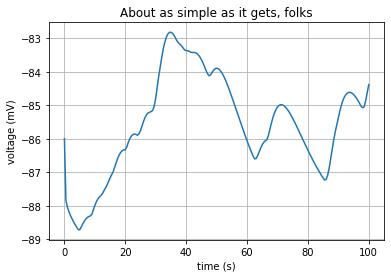

In [36]:
# Data for plotting
fig, ax = plt.subplots()
ax.plot(time[1:], volt_2[0][1:])

ax.set(xlabel='time (ms)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [1]:
import matplotlib.pyplot as plt

import numpy as np

from numpy import genfromtxt
#genfromtxt('my_file.csv', delimiter=',')
 

# Set the random seed for data generation

np.random.seed(2)

 

# Create rows of random data with 50 data points simulating rows of spike trains

data = genfromtxt('02-Data Analysis/data/lgn/plain/neuron_06_stimulus_07.csv', delimiter=',')
z=0
i=0
j=0
for i in range(10):
    for j in range(4500):
        if(data[i,j] == 1):
            x1 = [i,i+0.5]
            x2 = [j,j]
            plt.plot(x2,x1,color = 'black')
        else:
            z= z+1
# # Provide the title for the spike raster plot
plt.title('raster plot Neuron-5-Stimulus-7')
# # Give x axis label for the spike raster plot
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test1png.png', dpi=100)
# # Give y axis label for the spike raster plot
plt.ylabel('trial')
# # Display the spike raster plot
plt.show()


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-gz4gr5w6 because the default path (/home/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


OSError: 02-Data Analysis/data/lgn/plain/neuron_06_stimulus_07.csv not found.

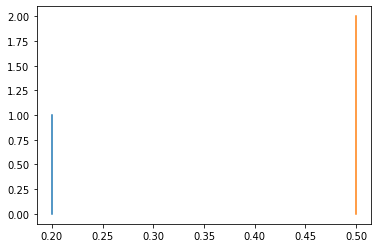

In [12]:
xspikes = [[0.2,0.5],[0.2,0.5],[0.2,0.5]]
yspikes = [[1,2],[1,2],[0,0]]

plt.plot(xspikes, yspikes)
plt.show()